In [62]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute, transpile
from qiskit.tools.visualization import plot_histogram

In [63]:
# Exponentiation modulaire
def apmod15(a, power):
    U = QuantumCircuit(4)
    
    for iteration in range(power):
        U.swap(2,3)
        U.swap(1,2)
        U.swap(0,1)
        for q in range(4):
            U.x(q)
    
    U = U.to_gate()
    U.name = "%i ^ %i mod 15" %(a,power)
    c_U = U.control()
    
    return c_U

In [64]:
n1 = 8 # Premier registre
n2 = 4 # Second registre
a = 7

In [65]:
# Transformee de Fourier quantique Inverse
def tfi(n):
    qc = QuantumCircuit(n)
    
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
        
    for j in range(n):
        qc.h(j)
        for m in range(j+1, n):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
            
    qc.name = "Transformee de Fourier Inverse"
    
    return qc

In [66]:
# Creation du circuit
qc = QuantumCircuit(n1 + n2, n1)

for q in range(n1):
    qc.h(q)

qc.x(3+n1)

for q in range(n1):
    qc.append(apmod15(a,2**q), [q]+[i+n1 for i in range(n2)])
    
qc.append(tfi(n1), range(n1))
qc.measure(range(n1), range(n1))
qc.draw(fold=-1)

┌───┐                                                                                                                                             ┌─────────────────────────────────┐┌─┐                     
 q_0: ┤ H ├────────■────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0                                ├┤M├─────────────────────
      ├───┤        │                                                                                                                                    │                                 │└╥┘┌─┐                  
 q_1: ┤ H ├────────┼────────────────■───────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤1                                ├─╫─┤M├──────────────────
      ├───┤        │                │                                                                                                                   │                                 │ ║ └╥┘┌─┐               
 q_2: ┤ H ├────────┼────────────────┼────────────────■──────────────────────────────────────────────────────────────────────────────────────────────────┤2                                ├─╫──╫─┤M├───────────────
      ├───┤        │                │                │                                                                                                  │                                 │ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├────────┼────────────────┼────────────────┼────────────────■─────────────────────────────────────────────────────────────────────────────────┤3                                ├─╫──╫──╫─┤M├────────────
      ├───┤        │                │                │                │                                                                                 │  Transformee de Fourier Inverse │ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├────────┼────────────────┼────────────────┼────────────────┼────────────────■────────────────────────────────────────────────────────────────┤4                                ├─╫──╫──╫──╫─┤M├─────────
      ├───┤        │                │                │                │                │                                                                │                                 │ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├────────┼────────────────┼────────────────┼────────────────┼────────────────┼─────────────────■──────────────────────────────────────────────┤5                                ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤        │                │                │                │                │                 │                                              │                                 │ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├────────┼────────────────┼────────────────┼────────────────┼────────────────┼─────────────────┼─────────────────■────────────────────────────┤6                                ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤        │                │                │                │                │                 │                 │                            │                                 │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├────────┼────────────────┼────────────────┼────────────────┼────────────────┼─────────────────┼─────────────────┼──────────────────■─────────┤7                                ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      └───┘┌───────┴───────┐┌───────┴───────┐┌───────┴───────┐┌───────┴───────┐┌───────┴────────┐┌───────┴────────┐┌───────┴────────┐┌────────┴────────┐└─────────────────────────────────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ─────┤0              ├┤0              ├┤0              ├┤0              ├┤0               ├┤0               ├┤0               ├┤0                ├────────────────────────────────────╫──╫──╫──╫──╫──╫──╫──╫─
           │               ││               ││               ││               ││                ││                ││                ││                 │                                    ║ 

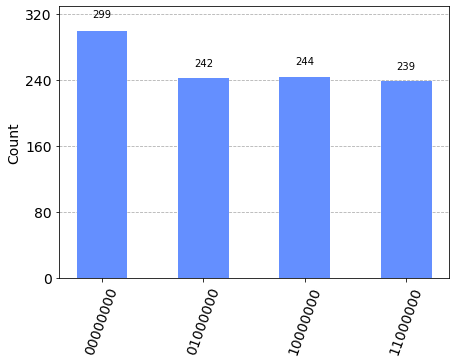

In [67]:
backend = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, backend)
counts = backend.run(t_qc).result().get_counts()
plot_histogram(counts)